Kamil Pieprzycki

# Part 1 Data Augmentation

In [ ]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers

In [ ]:
!pip install opendatasets


import opendatasets


opendatasets.download("https://www.kaggle.com/c/dogs-vs-cats/data")
!mkdir train
!unzip dogs-vs-cats/train.zip -d train

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kamilpieprzycki
Your Kaggle Key: ··········


100%|██████████| 812M/812M [00:37<00:00, 22.5MB/s]


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: train/train/dog.5499.jpg  
  inflating: train/train/dog.55.jpg  
  inflating: train/train/dog.550.jpg  
  inflating: train/train/dog.5500.jpg  
  inflating: train/train/dog.5501.jpg  
  inflating: train/train/dog.5502.jpg  
  inflating: train/train/dog.5503.jpg  
  inflating: train/train/dog.5504.jpg  
  inflating: train/train/dog.5505.jpg  
  inflating: train/train/dog.5506.jpg  
  inflating: train/train/dog.5507.jpg  
  inflating: train/train/dog.5508.jpg  
  inflating: train/train/dog.5509.jpg  
  inflating: train/train/dog.551.jpg  
  inflating: train/train/dog.5510.jpg  
  inflating: train/train/dog.5511.jpg  
  inflating: train/train/dog.5512.jpg  
  inflating: train/train/dog.5513.jpg  
  inflating: train/train/dog.5514.jpg  
  inflating: train/train/dog.5515.jpg  
  inflating: train/train/dog.5516.jpg  
  inflating: train/train/dog.5517.jpg  
  inflating: train/train/dog.5518.jpg  
  inflating: train/

In [ ]:
import os
import random
import shutil


if not os.path.isdir("TRAIN"):
      os.makedirs("TRAIN")

if not os.path.isdir("VALID"):
      os.makedirs("VALID")

if not os.path.isdir("TEST"):
      os.makedirs("TEST")

if not os.path.isdir("TRAIN/cats"):
      os.makedirs("TRAIN/cats")

if not os.path.isdir("VALID/cats"):
      os.makedirs("VALID/cats")

if not os.path.isdir("TEST/cats"):
      os.makedirs("TEST/cats")

if not os.path.isdir("TRAIN/dogs"):
      os.makedirs("TRAIN/dogs")

if not os.path.isdir("VALID/dogs"):
      os.makedirs("VALID/dogs")

if not os.path.isdir("TEST/dogs"):
      os.makedirs("TEST/dogs")

file_paths = []
dogs_file_paths = []
cats_file_paths = []

for label in os.listdir("train/train"):
  file_path = f"train/train/{label}"
  file_paths.append(file_path)

file_paths = sorted(file_paths)

for i, file_path in enumerate(file_paths):
  if i < 12500:
    cats_file_paths.append(file_path)
  else:
    dogs_file_paths.append(file_path)

for i in range(1000):
  file_path = random.choice(cats_file_paths)
  cats_file_paths.remove(file_path)
  new_file_path = f"TRAIN/cats/cats_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

  file_path = random.choice(dogs_file_paths)
  dogs_file_paths.remove(file_path)
  new_file_path = f"TRAIN/dogs/dogs_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

for i in range(500):
  file_path = random.choice(cats_file_paths)
  cats_file_paths.remove(file_path)
  new_file_path = f"VALID/cats/cats_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

  file_path = random.choice(dogs_file_paths)
  dogs_file_paths.remove(file_path)
  new_file_path = f"VALID/dogs/dogs_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

for i in range(500):
  file_path = random.choice(cats_file_paths)
  cats_file_paths.remove(file_path)
  new_file_path = f"TEST/cats/cats_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

  file_path = random.choice(dogs_file_paths)
  dogs_file_paths.remove(file_path)
  new_file_path = f"TEST/dogs/dogs_{i + 1}.jpg"

  if not os.path.isfile(new_file_path):
    shutil.move(file_path, new_file_path)

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
from matplotlib import pyplot as plt


datagen = image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

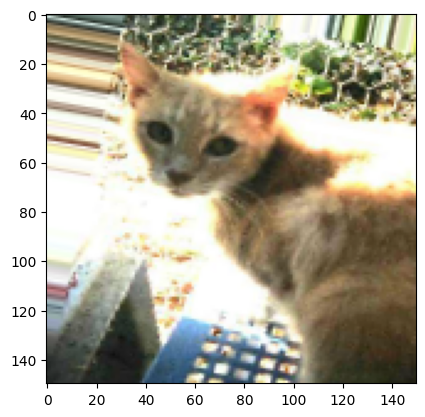

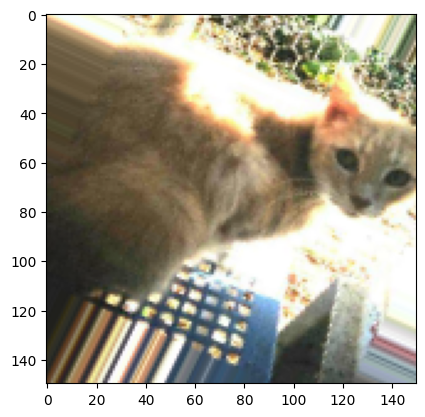

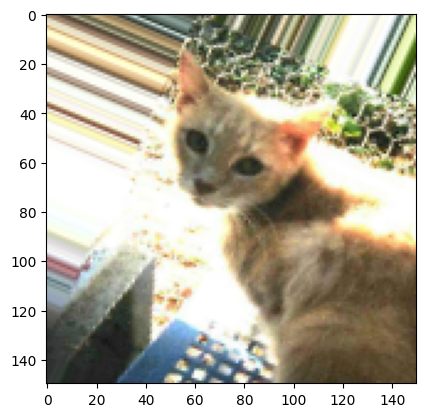

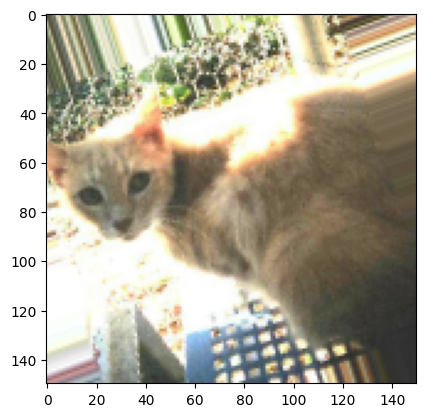

In [ ]:
fnames = [os.path.join("TRAIN/cats", fname) for fname in os.listdir("TRAIN/cats")]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plt.imshow(image.array_to_img(batch[0]))
    i += 1

    if i % 4 == 0:
        break

plt.show()

In [ ]:
image_height, image_width, image_channels = 150, 150, 3

model = models.Sequential()
# model.add(layers.Rescaling(scale=1./255, input_shape=(image_height, image_width, image_channels)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
train_datagen = image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        "TRAIN",
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        "VALID",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 27s 162ms/step - loss: 0.6932 - accuracy: 0.5155 - val_loss: 0.6875 - val_accuracy: 0.6160
Epoch 2/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6889 - accuracy: 0.5410 - val_loss: 0.6729 - val_accuracy: 0.5990
Epoch 3/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6790 - accuracy: 0.5675 - val_loss: 0.6620 - val_accuracy: 0.5930
Epoch 4/30
100/100 [==============================] - 17s 166ms/step - loss: 0.6751 - accuracy: 0.5595 - val_loss: 0.6558 - val_accuracy: 0.6160
Epoch 5/30
100/100 [==============================] - 16s 156ms/step - loss: 0.6665 - accuracy: 0.5895 - val_loss: 0.6790 - val_accuracy: 0.5790
Epoch 6/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6612 - accuracy: 0.6005 - val_loss: 0.6708 - val_accuracy: 0.5660
Epoch 7/30
100/100 [==========================

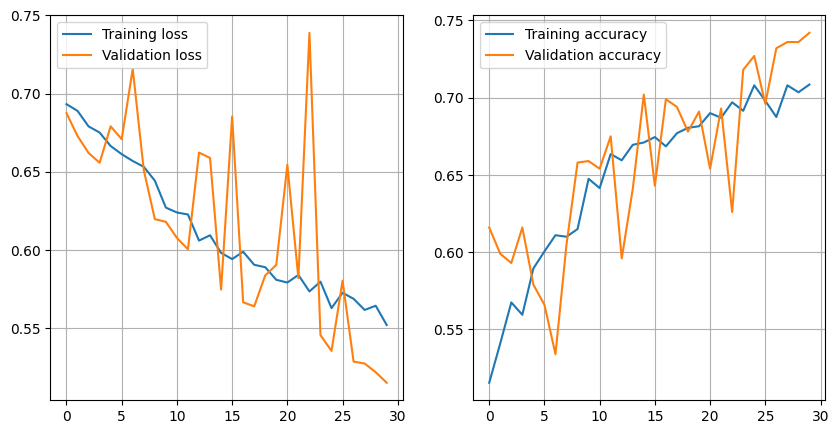

In [ ]:
history_dict = history.history
N1, N2 = 30, 30

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(np.arange(N1), history_dict["loss"][:30], np.arange(N1), history_dict["val_loss"][:30])
ax[0].legend(["Training loss", "Validation loss"])
ax[0].grid()
ax[1].plot(np.arange(N1), history_dict["accuracy"][:30], np.arange(N1), history_dict["val_accuracy"][:30])
ax[1].legend(["Training accuracy", "Validation accuracy"])
ax[1].grid()
plt.show()

# Part 2 Adding Dropout Layer

In [ ]:
image_height, image_width, image_channels = 150, 150, 3

model = models.Sequential()
# model.add(layers.Rescaling(scale=1./255, input_shape=(image_height, image_width, image_channels)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, image_channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
train_datagen = image.ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Set target directory:
        "TRAIN",
        # Resize images to 150x150 pixels:
        target_size=(150, 150),
        # Experiment with different batches:
        batch_size=20,
        # Labels needed for binary_crossentropy loss:
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        "VALID",
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      epochs=30,
      validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 20s 161ms/step - loss: 0.6960 - accuracy: 0.5060 - val_loss: 0.6894 - val_accuracy: 0.5090
Epoch 2/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6917 - accuracy: 0.5295 - val_loss: 0.6810 - val_accuracy: 0.5810
Epoch 3/30
100/100 [==============================] - 20s 202ms/step - loss: 0.6862 - accuracy: 0.5420 - val_loss: 0.6679 - val_accuracy: 0.6310
Epoch 4/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6775 - accuracy: 0.5590 - val_loss: 0.6704 - val_accuracy: 0.5610
Epoch 5/30
100/100 [==============================] - 16s 161ms/step - loss: 0.6736 - accuracy: 0.5720 - val_loss: 0.6754 - val_accuracy: 0.5660
Epoch 6/30
100/100 [==============================] - 16s 161ms/step - loss: 0.6631 - accuracy: 0.5855 - val_loss: 0.6427 - val_accuracy: 0.6390
Epoch 7/30
100/100 [==========================

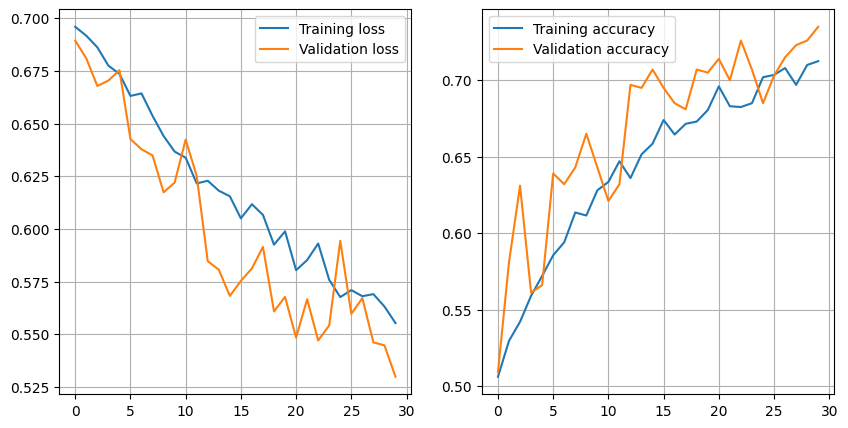

In [ ]:
history_dict = history.history
N1, N2 = 30, 30

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].plot(np.arange(N1), history_dict["loss"][:30], np.arange(N1), history_dict["val_loss"][:30])
ax[0].legend(["Training loss", "Validation loss"])
ax[0].grid()
ax[1].plot(np.arange(N1), history_dict["accuracy"][:30], np.arange(N1), history_dict["val_accuracy"][:30])
ax[1].legend(["Training accuracy", "Validation accuracy"])
ax[1].grid()
plt.show()